### INCORPORACIÓN DE LAS CORRELACIONES PROBABILÍSTICAS EN LA SIMULACIÓN DE MONTECARLO

**Objetivo** 

El objetivo del presente artículo es introducir, dentro de la simulación de Montecarlo, la correlación entre variables físicamente dependientes. Se introduce el método del Sobre para la simulación de variables que físicamente están correlacionadas, con el objetivo de minimizar la dispersión que la generación de muestras aleatorias independientes introdujo en el resultado del ejercicio anterior. 


**Alcance**

El presente artículo es la cuarta y última etapa en el análisis de variables aleatorias, en este caso realizaremos simulaciones de Montecarlo teniendo en cuenta la correlación entre las diferentes variables de estudio. Para la ejecución de esta parte utilizaremos toda Numpy, Pandas, Pyplot, Seaborn y Reliability y SALib para Python. 



**Ejercicio #4 - Simulación de Montecarlo considerando dependencias probabilísticas.**
En este ejercicio se realizó nuevamente el cálculo probabilístico de petróleo original en sitio (POES), con Simulación de Montecarlo, con los mismos datos utilizados en el ejemplo anterior, pero incorporando ahora los factores de correlación que pudieran existir entre las diversas variables.

En este artículo, explicaremos el más sencillo de estos métodos, conocido como “Método del Sobre” el cual se puede resumir en los siguientes pasos:

**Paso 1:** Graficar las variables entre las que se sospecha correlación, en este caso una variable X y Y que tienen una correlación moderada o fuerte. 

**Paso 2:** Hallar las ecuaciones que definen las líneas L1 y L2 que limitan (envuelven como un sobre) todos los puntos del gráfico

L1.Y: = m1.X+b1 : L1 es la línea que define los máximos valores según la correlación
L2.Y: = m2.X+b2 : L2 es la línea que define los mínimos valores según la correlación

**Paso 3:** Generar un valor aleatorio X   desde la distribución de probabilidades de esta variable y calcular los correspondientes valores de las líneas Y1 y Y2 respectivamente.

**Paso 4:** Generar un valor aleatorio Y  desde la distribución de probabilidades de esta variable.

**Paso 5:** Si se cumple que L1Y ≤ Y ≤ L2Y, entonces X  y Y son valores aleatorios que cumplen con la correlación y pueden considerarse valores probables de las variables y sustituirlos en la formula, si no se cumple entonces se vuelve al Paso 4.

https://www.vosesoftware.com/models/037.php

### **CORRELACIÓN PROBABILÍSTICA O INTERDEPENDENCIA**
Se dice que dos variables aleatorias o distribuidas están correlacionadas, o que son interdependendientes si existe una relación monotónica entre ambas. Una relación monotónica entre dos variables existe cuando cualquier incremento en una de las variables esta invariablemente asociada con un incremento o decrecimiento en la otra variable.

Para detectar si hay alguna correlación entre ellas realizaremos la matriz de correlación y los gráficos de dispersión.

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import reliability as rel
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.path.abspath('..\CONFIABILIDAD INTEGRAL'))
import scripts
np.random.seed(8)
%matplotlib inline

In [2]:
# Importamos la data para analizar las correlaciones existentes
df = pd.read_csv("DATOS YACIMIENTOS.csv")
Sw = df["SATURACION (Sw)"]
ANP = df["ARENA (ANP)"]
F = df["POROSIDAD (F)"]
df.head()

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
0,0.212,118.00,0.198
1,0.217,121.00,0.200
2,0.204,114.25,0.208
3,0.206,76.00,0.204
4,0.209,72.00,0.198


### **COEFICIENTE DE CORRELACIÓN ORDINARIO O COEFICIENTE DE PEARSON**

Este modelo de coeficiente de correlación presenta algunas limitaciones importantes, especialmente cuando alguna de las variables que se correlacionan tiene una distribución de probabilidades fuertemente sesgada; en otras palabras, este coeficiente es apropiado para estimar correlación entre variables que tengan el mismo tipo de distribución y que tengan preferiblemente distribuciones simétricas.


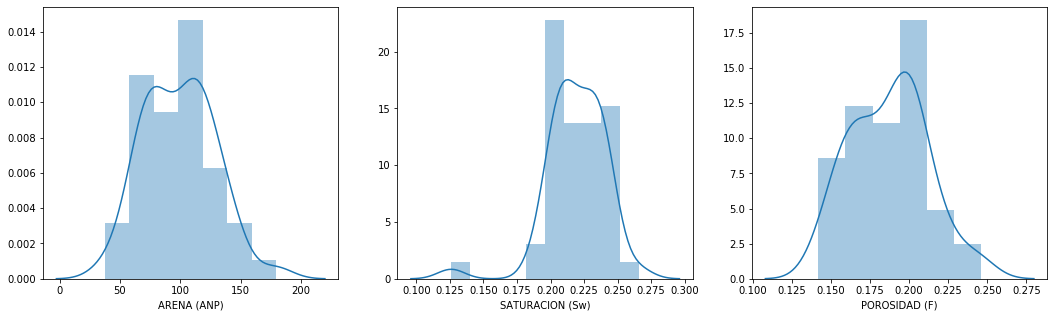

In [4]:
# Verificamos rapidamente la distribucion de nuestras variables de estudio.
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 5))
sns.distplot(df["ARENA (ANP)"], ax=ax1)
sns.distplot(df["SATURACION (Sw)"], ax=ax2)
sns.distplot(df["POROSIDAD (F)"], ax=ax3)

In [5]:
# Realizamos la matriz de correlacción con el metodo de Pearson. 
df.corr(method="pearson")

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
SATURACION (Sw),1.000000,-0.415684,-0.832407
ARENA (ANP),-0.415684,1.000000,0.574030
POROSIDAD (F),-0.832407,0.574030,1.000000


Las variables tienen distribuciones similares, sin embargo, la variable Sw - saturación de agua presenta un sesgo a la izquierda, por lo que revisaremos otro método de correlación. 

### **COEFICIENTE DE CORRELACIÓN POR RANKING O COEFICIENTE DE SPEARMAN**

Como se mencionó en la sección anterior, el coeficiente de correlación de Pearson tiene limitaciones cuando se estima la correlación entre pares de variables que tengan sesgos marcados. Esto implica que antes de calcular el coeficiente hay que verificar que distribución tienen las
variables, para descartar que haya alguna con sesgo marcado. 

Para evitar esta limitación y proporcionar un modelo que permita calcular el coeficiente de correlación independientemente del tipo de distribución, Charles Spearman propuso hacer el mismo calculo propuesto por Pearson, pero sustituir el “valor de cada observación de una muestra” por su “ranking” en orden ascendente dentro de la muestra.

In [6]:
# Definimos el metodo "spearman" para verificar el resultado
df.corr(method="spearman")

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
SATURACION (Sw),1.000000,-0.498872,-0.890178
ARENA (ANP),-0.498872,1.000000,0.557368
POROSIDAD (F),-0.890178,0.557368,1.000000


Para este caso los coeficientes de Pearson y Spearman difieren ligeramente; pero existen casos en que la diferencia puede ser mayor. Se recomienda usar como caso base el Coeficiente por Ranking o Coeficiente de Spearman, ya que este no depende del tipo de distribución de las variables que se correlacionan.

### ***Graficos de dispersion de variables***
Visualmente tambien podemos observar la correlacion entre las variables del analisis. 

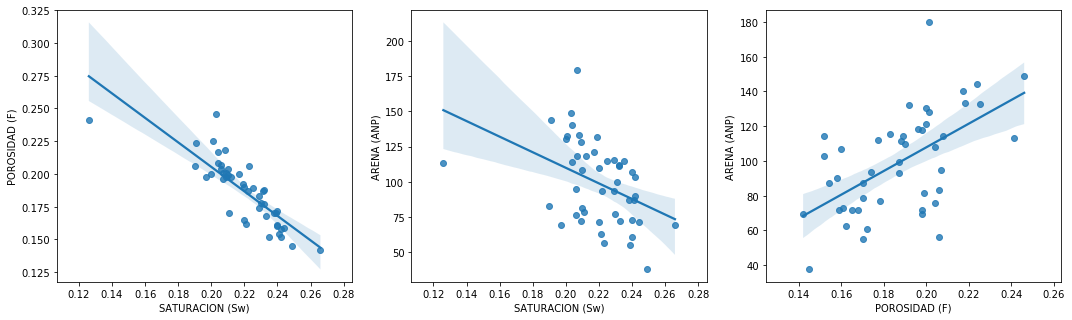

In [19]:
# Verificamos rapidamente la distribucion de nuestras variables de estudio.
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 5))
sns.regplot("SATURACION (Sw)", "POROSIDAD (F)",data=df, ax=ax1)
sns.regplot("SATURACION (Sw)", "ARENA (ANP)",data=df, ax=ax2)
sns.regplot("POROSIDAD (F)", "ARENA (ANP)", data=df, ax=ax3)

### **MATRIZ DE VARIANZAS-COVARIANZAS**

Una matriz de varianzas-covarianzas es una matriz cuadrada que contiene las varianzas y covarianzas asociadas con diferentes variables. Los elementos de la diagonal de la matriz contienen las varianzas de las variables, mientras que los elementos que se encuentran fuera de la diagonal contienen las covarianzas entre todos los pares posibles de variables.

Muchas aplicaciones estadísticas calculan la matriz de varianzas-covarianzas para los estimadores de los parámetros en un modelo estadístico. Suele utilizarse para calcular los errores estándar de los estimadores o las funciones de los estimadores. Por ejemplo, la regresión logística crea esta matriz para los coeficientes estimados, lo que permite ver las varianzas de los coeficientes y las covarianzas entre todos los pares posibles de coeficientes.

In [5]:
# Realizamos la matriz de Varianza-Covarianzas
df.cov()

,SATURACION (Sw),ARENA (ANP),POROSIDAD (F)
SATURACION (Sw),0.000479,-0.265878,-0.000448
ARENA (ANP),-0.265878,853.435751,0.412634
POROSIDAD (F),-0.000448,0.412634,0.000605


### **Analís de los resultados:**

Durante la realización del análisis de correlación encontramos que existe una alta correlación negativa entre **Sw y F de -0.89**; una correlación moderada negativa entre **Sw y ANP de -0.49** y una correlación moderada positiva entre **F – ANP de 0.56**. Adicional podemos observar que la covarianza es menor entre Sw – F y Sw -ANP, por lo que estas dos correlaciones se utilizaran para construir los modelos lineales a introducir en la simulación de Montecarlo. 


### **¿POR QUÉ ES IMPORTANTE CONSIDERAR LA INTERDEPENDENCIA EN LA SIMULACIÓN DE MONTECARLO?**
Como el lector ha podido comprender en la sección anterior, el algoritmo de Montecarlo realiza un muestreo aleatorio de cada una de las variables que intervienen en el modelo a simular. Una vez que tiene un valor puntual de cada una de estas variables, las sustituye en el modelo matemático y el mismo almacena el resultado. Esta operación es realizada tantas veces como se
defina en el número de iteraciones solicitadas.

Ahora bien, este muestreo de las variables lo realiza el algoritmo de Montecarlo sin ningún tipo de correlación entre las variables, a no ser que explícitamente se le indique que existe tal interdependencia entre algunas de las variables. Esta situacion nos lleva a que se puedan presentar convinaciones de valores que fisicamente no sean posibles en la vida real por lo cual los resultados arrojados por el mismo no serán representación fidedigna de la realidad por cuanto parte de esos escenarios no tendrían sentido práctico y real. De allí la importancia de considerar la interdependencia entre las variables mediante la estimación de los factores o coeficientes de correlación correspondientes y su incorporación dentro del modelo.

Para incluir la correlacion entre ambas varialbes ejecutaremos el procedimiento descrito en el ejercicio del articulo:

**Paso 1:** Graficar las variables entre las que se sospecha correlación, en este caso una variable X y Y que tienen una correlación moderada o fuerte. 

**Paso 2:** Hallar las ecuaciones que definen las líneas L1 y L2 que limitan (envuelven como un sobre) todos los puntos del gráfico

L1.Y: = m1.X+b1 : L1 es la línea que define los máximos valores según la correlación
L2.Y: = m2.X+b2 : L2 es la línea que define los mínimos valores según la correlación

Para la ejecución de los pasos 1 y 2 nos apoyamos en una función creada para hallar las fórmulas de los limites superiores e inferiores llamada met_sobre, que se encuentra en el archivo de scripts adjunto.

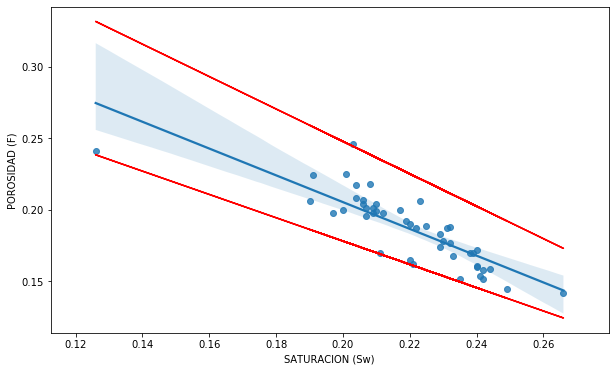

('-0.936 * x + 0.392', '0.870*(-0.936 * x + 0.392)', '1.210*(-0.936 * x + 0.392)')


In [3]:
# Hallamos las fórmulas lineales que definen el límite superior e inferior de la correlación entre variables Sw y F
formulas_SW_F= scripts.met_sobre(Sw,F,df)

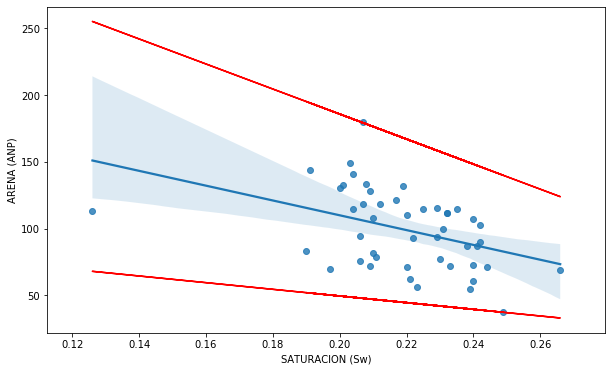

('-554.645 * x + 220.838', '0.450*(-554.645 * x + 220.838)', '1.690*(-554.645 * x + 220.838)')


In [4]:
# Hallamos las fórmulas lineales que definen el límite superior e inferior de la correlación entre variables Sw y ANP
formulas_SW_ANP= scripts.met_sobre(Sw,ANP,df)

Para demostrar la importancia de incluir la correlación de la variables de entrada, procedemos a verificar la correlación que existe entre los resultados de la simulación de Montecarlo sin correlación del ejercicio anterior y verificamos como aplican los limites encontrados en esta fase.

In [8]:
# Llamamos los resultados de las simulación sin correlación y extraemos las variables de interés.
df2 = pd.read_csv("RESULT_SIM.csv", index_col=0)
result_Sw=df2["Sw"]
result_F =df2["F"]
result_ANP =df2["ANP"]

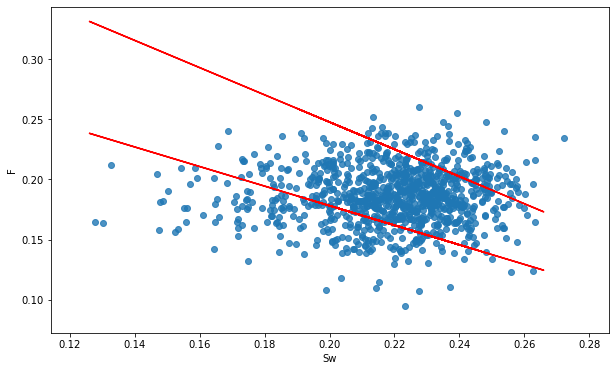

In [7]:
# Graficamos los resultados de la simulación y los limites superiores e inferiores hallados de los datos originales, revisamos
# como se ajustan a los resultados de la simulación. 
plt.figure(figsize=(10,6))
sns.regplot(x=result_Sw, y=result_F, data=df2, fit_reg=False)
plt.plot(Sw, [eval(formulas_SW_F[1]) for x in Sw], color="r")
plt.plot(Sw, [eval(formulas_SW_F[2]) for x in Sw], color="r")

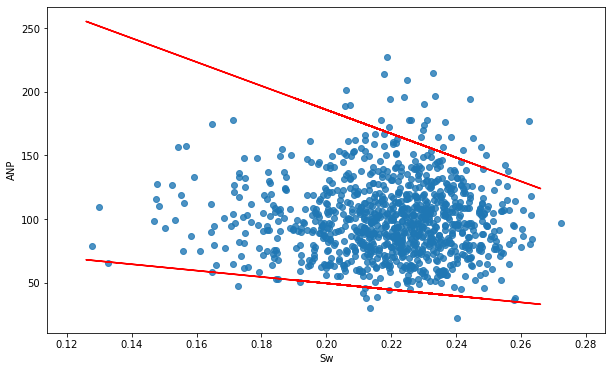

In [10]:
# Graficamos los resultados de la simulación y los limites superiores e inferiores hallados de los datos originales, revisamos
# como se ajustan a los resultados de la simulación. 
plt.figure(figsize=(10,6))
sns.regplot(x=result_Sw, y=result_ANP, data=df2, fit_reg=False)
plt.plot(Sw, [eval(formulas_SW_ANP[1]) for x in Sw], color="r")
plt.plot(Sw, [eval(formulas_SW_ANP[2]) for x in Sw], color="r")

### **Análisis de resultados:**
Podemos observar que los resultados de la simulación de Montecarlo sin correlación presentan situaciones que físicamente pudieran no llegar a ser posibles como por ejemplo bajo valores de saturación de agua con bajos valores de porosidad. Por lo anterior es necesario desarrollar un script que introduzca dicha correlación a la simulación de Montecarlo.  

### **SIMULACIÓN DE MONTECARLO EN BASE A LA CORRELACIÓN ENTRE VARIABLES.**
Para realizar la simulación llamamos los modelos que caracterizan cada una de las variables de entrada realizadas durante el ejercicio anterior. Desarrollamos un script para incluir dentro de la simulación, las formulas obtenidas de cada una de las correlaciones seleccionadas.

In [5]:
# Creamos el objeto Weibull_Distribution con los parámetros de α y β que nos sugiere la herramienta. 
Sw_dist = rel.Distributions.Weibull_Distribution(alpha=0.228274, beta=12.4053)
# Creamos el objeto Gamma_Distribution con los parámetros de α y β que nos sugiere la herramienta. 
ANP_dist = rel.Distributions.Gamma_Distribution(alpha=8.86427, beta=11.1876)
# Creamos el objeto Normal_Distribution con los parámetros de μ y ς que nos sugiere la herramienta.
F_dist = rel.Distributions.Normal_Distribution(mu=0.187277, sigma=0.024343)
# Se importa la función Beta_Pert de la biblioteca personal
A_dist = scripts.Beta_Pert(2500,2961,3200)
# Se importa la función Uniforme de la biblioteca personal
Bo_dist = scripts.Uniform(1.05,1.25)

In [16]:
# Generamos la contante que describe la cantidad de iteraciones necesarias para el modelo. 
iter_val =1000
result_sim = pd.DataFrame()
lista_val_Sw= [Sw_dist.random_samples(1).item() for i in range(iter_val)]
lista_val_F=[]
lista_val_ANP=[]

#Forzamos la salida de las variables F y ANP en base a las ecuaciones limites extraída de los datos originales. 
for x in lista_val_Sw:
    while True:
        y_low=eval(formulas_SW_F[1])
        y_upp=eval(formulas_SW_F[2])
        y = F_dist.random_samples(1).item()
        if y >= y_low and y <= y_upp:
            lista_val_F.append(y)
            break
        else:
            continue

for x in lista_val_Sw:
    while True:
        y_low=eval(formulas_SW_ANP[1])
        y_upp=eval(formulas_SW_ANP[2])
        y = ANP_dist.random_samples(1).item()
        if y >= y_low and y <= y_upp:
            lista_val_ANP.append(y)
            break
        else:
            continue
# Armamos el dataframe de los resultados.          
result_sim["Sw"]=lista_val_Sw
result_sim["F"] = lista_val_F
result_sim["ANP"] = lista_val_ANP
result_sim["A"] = [A_dist.random_samples(1).item() for i in range(iter_val)]
result_sim["Bo"] = [Bo_dist.random_samples(1).item() for i in range(iter_val)]

In [17]:
#Mostramos la tabla de resultados. 
result_sim.head()

,Sw,F,ANP,A,Bo
0,0.232903,0.154594,104.921113,3015.237593,1.094772
1,0.212350,0.182362,74.874304,2934.187300,1.241516
2,0.223177,0.170383,87.486379,2606.460667,1.216991
3,0.223428,0.186058,123.428132,3002.319530,1.230043
4,0.201272,0.182640,98.046275,2568.332550,1.204737


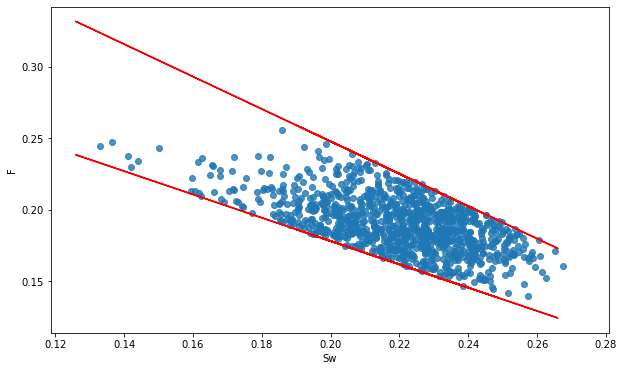

In [19]:
# Graficamos los resultados de la simulación y los limites superiores e inferiores hallados de los datos originales, revisamos
# como se ajustan a los resultados de la simulación. 
plt.figure(figsize=(10,6))
sns.regplot(x="Sw", y="F", data=result_sim, fit_reg=False)
plt.plot(Sw, [eval(formulas_SW_F[1]) for x in Sw], color="r")
plt.plot(Sw, [eval(formulas_SW_F[2]) for x in Sw], color="r")

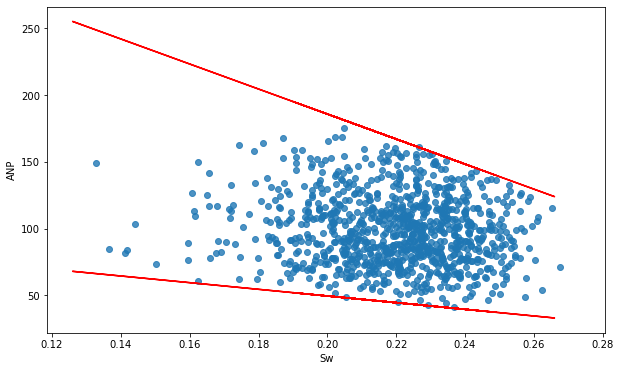

In [20]:
# Graficamos los resultados de la simulación y los limites superiores e inferiores hallados de los datos originales, revisamos
# como se ajustan a los resultados de la simulación. 
plt.figure(figsize=(10,6))
sns.regplot(x="Sw", y="ANP", data=result_sim, fit_reg=False)
plt.plot(Sw, [eval(formulas_SW_ANP[1]) for x in Sw], color="r")
plt.plot(Sw, [eval(formulas_SW_ANP[2]) for x in Sw], color="r")

In [21]:
# Aplicación de la formula POES a las variables generadas.
result_sim["POES"] = result_sim.apply(lambda row:( (0.007758* row.A * row.ANP*row.F*(1-row.Sw))/row.Bo), axis = 1)

In [44]:
# Mostramos los 5 primeros resultados
result_sim.head()

,Sw,F,ANP,A,Bo,POES
0,0.232903,0.154594,104.921113,3015.237593,1.094772,265.860110
1,0.212350,0.182362,74.874304,2934.187300,1.241516,197.190152
2,0.223177,0.170383,87.486379,2606.460667,1.216991,192.399329
3,0.223428,0.186058,123.428132,3002.319530,1.230043,337.699781
4,0.201272,0.182640,98.046275,2568.332550,1.204737,236.556292


Realizamos la caracterizacion de la variable POES con el fin de determinar cual es la distribucion probabilistica que mas se adecua a los datos.

                  Alpha     Beta    Gamma       Mu     Sigma      Lambda          AICc           BIC
Distribution                                                                                        
Lognormal_2P                               5.62681  0.314259              11780.427890  11790.231364
Lognormal_3P                      3.88155    5.612  0.319041              11783.019298  11790.231364
Gamma_2P        27.9031  10.4508                                          11780.704910  11790.508384
Gamma_3P        35.7897  6.57518  56.2852                                 11777.211996  11791.911166
Weibull_3P      223.144  2.28595  94.0728                                 11792.846786  11807.545955
Normal_2P                                  291.609   91.4149              11872.705825  11882.509300
Weibull_2P      324.397  3.33771                                          11882.826475  11892.629949
Exponential_2P                    96.2083                     0.00511769  12554.115881  125

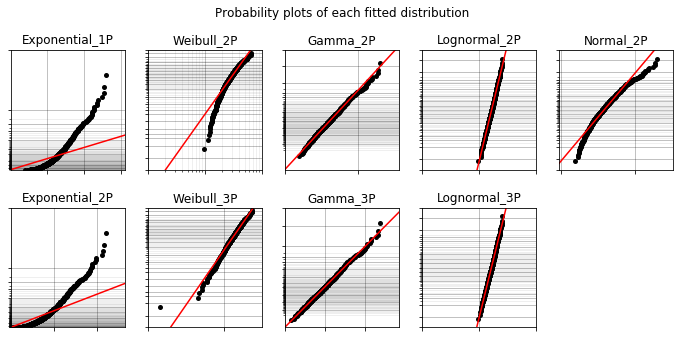

In [23]:
# Caracterizamos la variable POES
POES = result_sim["POES"]
rel.Fitters.Fit_Everything(np.array(POES), show_histogram_plot=False, show_PP_plot=False, show_probability_plot=True)

Comparado con los resultados del análisis anterior, el modelo recomendado finalmente es el  Lognormal 2P, lo cual nos reitera la correcta selección del modelo durante el ejercicio anterior apoyándonos en los gráficos de probabilidad de cada una de las distribuciones; por lo anterior procedemos con la implementación de la distribución con los datos obtenidos. 

In [24]:
# Creamos un objeto con la distribucion Lognormal con dos parametros
POES_dist = rel.Distributions.Lognormal_Distribution(mu=5.62681,sigma=0.314259)

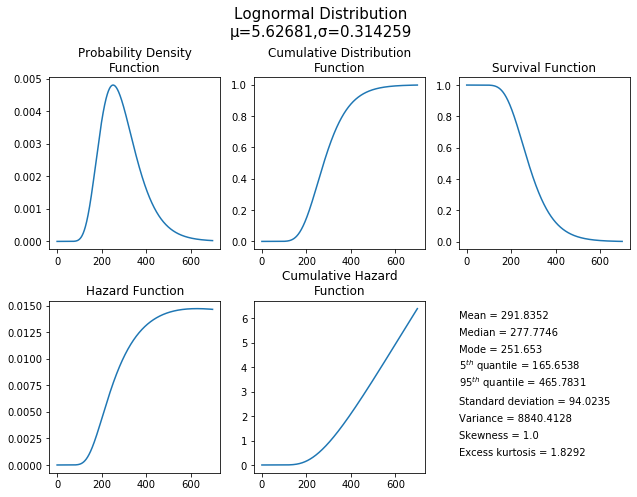

In [25]:
# Graficamos las diferentes de la funcion que describe la variable POES
POES_dist.plot()
plt.show()

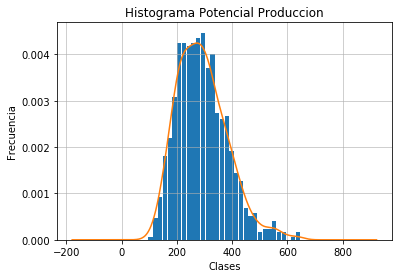

(None,
                   Clases  # Puntos  Probabilidad  Densidad
 0    (96.2093, 113.4343)         1         0.001  0.000058
 1   (113.4343, 130.6593)         8         0.008  0.000464
 2   (130.6593, 147.8843)        16         0.016  0.000929
 3   (147.8843, 165.1093)        31         0.031  0.001800
 4   (165.1093, 182.3343)        38         0.038  0.002206
 5   (182.3343, 199.5593)        53         0.053  0.003077
 6   (199.5593, 216.7843)        73         0.073  0.004238
 7   (216.7843, 234.0093)        73         0.073  0.004238
 8   (234.0093, 251.2343)        72         0.072  0.004180
 9   (251.2343, 268.4593)        73         0.073  0.004238
 10  (268.4593, 285.6843)        75         0.075  0.004354
 11  (285.6843, 302.9093)        77         0.077  0.004470
 12  (302.9093, 320.1343)        64         0.064  0.003716
 13  (320.1343, 337.3593)        69         0.069  0.004006
 14  (337.3593, 354.5843)        47         0.047  0.002729
 15  (354.5843, 371.8093)        

In [26]:
#Realizamos la distribucion de las resultados de las simulacion. 
scripts.histo_frec(POES, "Potencial Produccion")

### **Analisis del resultado de la caracterizacion de la variable POES.**

Como resultado de este nuevo análisis podemos observar que luego de la simulación de Montecarlo ajustada a la correlación entre las variables de entrada, encontramos que la función que mejor describe la variable compuesta POES es, una distribución Lognormal de 2 parámetros mu=5.62681 y sigma=0.314259. En esta ocasión la expectativa de producción media del yacimiento analizado es de  291.83 Mbrls que variando entre 285.68-302.90 Mbrls totales, con una desviación estándar de 94.02 Mbrls y un intervalo de confianza del 95%.

Este nuevo resultado nos demuestra la importancia de realizar he incluir la correlación de las variables dentro de la simulación con el fin de garantizar que los resultados se ajusten a las características físicas del objeto de estudio.

### **Análisis de Sensibilidad por contribución a la varianza - cálculo POES.**

Realizamos nuevamente el análisis de sensibilidad verificando el grado de importancia que tienen las variables de entrada en el resultado de la variable de salida POES. 

In [27]:
# Verificamos la descripción estadística de nuestros resultados.
result_sim.describe()

,Sw,F,ANP,A,Bo,POES
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.219471,0.190656,98.523756,2928.152169,1.150966,291.608882
std,0.020584,0.018944,26.135974,128.858721,0.057420,91.460630
min,0.132914,0.140010,40.844592,2568.332550,1.050022,96.209260
25%,0.206341,0.177913,78.544189,2839.148569,1.103805,222.941649
50%,0.221684,0.190058,96.092687,2933.651546,1.151706,282.366587
75%,0.234038,0.202688,115.672253,3027.873774,1.199491,344.296407
max,0.267472,0.255557,175.306002,3176.355225,1.249778,647.409322


In [28]:
# Importamos la librería especializada en el análisis de sensibilidad. 
from SALib.sample import saltelli
from SALib.analyze import sobol

In [29]:
#Definimos la función POES para el análisis de sensibilidad.  
def POES_func(Sw,ANP,F,A,Bo):
    return 7758*A*ANP*F*(1-Sw)/Bo

In [31]:
# Definimos la cantidad de iteraciones y el problema
N = 1000

# Definimos el problema con sus limites min-max para la simulación
problem = {
    "num_vars": 5, 
    "names": ["Sw", "ANP","F","A","Bo"], 
    "bounds": [[0.1329, 0.2674], [40.8445, 175.3060],[0.1400,0.2555],[2568.3325,3176.3552],[1.0500,1.2497]]
}

# Generamos la cantidad n de muestras
sample = saltelli.sample(problem, N)
Y = np.empty([sample.shape[0]])

# Evaluamos el modelo para cada punto de muestra
for i in range(len(Y)):
    x = sample[i]
    Y[i] = POES_func(x[0], x[1],x[2],x[3],x[4])
    
# Estimamos los índices de sensibilidad utilizando el método Sobol
sensitivity = sobol.analyze(problem, Y)

In [36]:
# Sensibilidad de primer orden
sensitivity["S1"]

array([0.01413859, 0.77161576, 0.16069714, 0.02169914, 0.01538089])

In [37]:
# Sensibilidad Global
sensitivity["ST"]

array([0.01615372, 0.79177366, 0.18548939, 0.02525775, 0.01771623])

In [38]:
# Matriz de sensibilidad de segundo orden
sensitivity["S2"]

array([[        nan,  0.00189837, -0.00037783, -0.0002593 , -0.00085086],
       [        nan,         nan,  0.01163798, -0.00085132, -0.0035257 ],
       [        nan,         nan,         nan,  0.01237695,  0.01229276],
       [        nan,         nan,         nan,         nan, -0.00288708],
       [        nan,         nan,         nan,         nan,         nan]])

In [43]:
# Creamos la matriz de resultados
import itertools
dictt=dict(itertools.islice(sensitivity.items(), 4))
result_sens =pd.DataFrame(dictt,index=["Sw", "ANP","F","A","Bo"])

# Presentamos el resultado de la matriz. 
result_sens

,S1,S1_conf,ST,ST_conf
Sw,0.014139,0.013034,0.016154,0.001402
ANP,0.771616,0.055603,0.791774,0.065039
F,0.160697,0.035932,0.185489,0.021760
A,0.021699,0.013285,0.025258,0.002762
Bo,0.015381,0.011314,0.017716,0.001962


<BarContainer object of 5 artists>

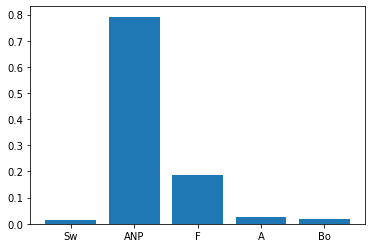

In [42]:
# Graficamos los resultados de la sensibilidad global.
plt.bar(x=["Sw", "ANP","F","A","Bo"], height=sensitivity["ST"])

### **Conclusión:**
En este grafico de barras nuevamente podemos observar que la varianza de la variable de salida POES está influenciada de manera dominante por la varianza de la variable de entrada ANP; (79 % de la varianza del POES es causada por la varianza de la variable ANP). Vemos también como al introducir la correlación la segunda variable dominante que era la Porosidad (F) disminuye considerablemente lo cual nos reitera que para disminuir la incertidumbre del POES debemos centrar toda la atención en las razones de la dispersión o varianza del ANP y ver si esta es reducible de alguna manera o si simplemente está asociada a la heterogeneidad del yacimiento.

Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
ruslombia@gmail.com  
Bogotá – Colombia_  